# Asking Questions and Analyzing

## Import các thư viện cần thiết và đọc các file dữ liệu

In [1]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
manga_df = pd.read_csv('./Data/manga.csv')
manga_df

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,members,favorites,sfw,approved,created_at_before,updated_at,real_start_date,real_end_date,genres,themes,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms,jikan
0,2,Berserk,manga,9.45,268737,currently_publishing,NaN,NaN,1989-08-25,NaN,551266,103820,True,True,2007-07-17 20:14:45+00:00,2022-06-23 08:30:44+00:00,1989-08-25,NaN,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Gore', 'Military', 'Mythology', 'Psychologic...",['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype'],True
1,13,One Piece,manga,9.20,305917,currently_publishing,NaN,NaN,1997-07-22,NaN,501291,99526,True,True,2007-07-17 20:14:45+00:00,2022-04-18 04:48:35+00:00,1997-07-22,NaN,"['Action', 'Adventure', 'Fantasy']",[],['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""Pirate...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[],True
2,25,Fullmetal Alchemist,manga,9.05,143879,finished,27.0,116.0,2001-07-12,2010-09-11,264571,28519,True,True,2007-07-17 20:14:45+00:00,2022-06-13 18:46:09+00:00,2001-07-12,2010-09-11,"['Action', 'Adventure', 'Award Winning', 'Dram...",['Military'],['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts...",True
3,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.27,125482,finished,24.0,96.0,2004-01-19,2011-04-19,209123,35456,True,True,2007-10-07 08:14:20+00:00,2022-04-18 04:02:35+00:00,2004-01-19,2011-04-19,"['Action', 'Adventure', 'Horror', 'Mystery', '...",['Historical'],"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ...",True
4,4632,Oyasumi Punpun,manga,9.03,141146,finished,13.0,147.0,2007-03-15,2013-11-02,354176,43168,True,True,2008-02-03 15:54:30+00:00,2022-04-18 04:47:05+00:00,2007-03-15,2013-11-02,"['Drama', 'Slice of Life']",['Psychological'],['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/164...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67268,149662,Scary Campus College University,manga,NaN,0,currently_publishing,NaN,NaN,2022-07-25,NaN,0,0,True,False,2022-07-25 00:02:54+00:00,NaN,2022-07-25,NaN,"['Horror', 'Supernatural', 'Suspense']",[],['Seinen'],[],[],NaN,NaN,https://cdn.myanimelist.net/images/manga/1/265...,https://myanimelist.net/manga/149662,NaN,スケアリー・キャンパス・カレッジ・ユニバーシティ,[],False
67269,149663,"Dorei Tensei: Sono Dorei, Saikyou no Moto Ouji...",light_novel,NaN,0,currently_publishing,NaN,NaN,2020-09-30,NaN,0,0,True,False,2022-07-25 00:02:54+00:00,NaN,2020-09-30,NaN,"['Action', 'Adventure', 'Fantasy']",[],[],[],[],"Ars, the prince of the Kingdom of Karit

In [3]:
author_df = pd.read_csv('./Data/author.csv')
author_df

,first_name,last_name,role
0,Osamu,Tezuka,"['Story', 'Art', 'Story & Art']"
1,Go,Nagai,"['Story', 'Art', 'Story & Art']"
2,Ryuu,Sugahara,"['Story', 'Art', 'Story & Art']"
3,Mi Ri,Hwang,"['Story', 'Art', 'Story & Art']"
4,Nano,Aiuchi,['Story']
...,...,...,...
23436,Kei,Inayoshi,['Story']
23437,Kaisei,Kishi,"['Story', 'Art', 'Story & Art']"
23438,Tsukumo,Abe,"['Story', 'Art', 'Story & Art']"
23439,NaN,Bowie Knife,"['Story', 'Art', 'Story & Art']"


---

## **_01. Asking Meaningfull Questions:_**

### **_01.1. Câu hỏi 01: Hệ thống khuyến nghị_**

- **Nội dung**: Những bộ manga nào là phù hợp đối với mỗi đối tượng (`demographics`)?
- **Mục đích**: Cải thiện hệ thống khuyến nghị (recommendation system) của MAL.
- **Phân tích**:
    - Đầu tiên là tìm thể loại (`genres`) phổ biến nhất với từng đối tượng.
    - Sử dụng hồi quy tuyến tính dựa vào 3 đầu vào là `scored_by`, `members`, `favorites` để dự đoán `score`.
    - Đưa ra ngưỡng `score` khuyến nghị kết hợp với thể loại đã tìm được ở trên để recommend những manga mang tính khuyến nghị cao cho từng đối tượng.

### **_01.2. Câu hỏi 02: Thởi điểm bùng nổ manga_**

- **Nội dung**: Đâu là những thời điểm bùng nổ của manga, cũng như các `genres` và `themes` phổ biến nhất ở những thời điểm này, tỉ lệ bao nhiêu trong số đó đã thành công đến thời điểm hiện tại.
- **Mục đích**: Phân tích này mang ý nghĩa thông kê, phân tích để thấy được quá trình phát triển của của ngành công nghiệp manga, đồng thời cũng giúp so sánh với thời điểm hiện tại một phần giúp các mangaka chọn được thể loại và chủ đề sáng tác.
- **Phân tích**:
    - Đếm số manga bắt đầu mỗi năm dựa vào `real_start_date`, thời điểm bùng nổ là những vùng xung quanh cực đại.
    - Tìm các các `genres` và `themes` xuất hiện nhiều nhất trong những thời điểm này.
    - Tìm các bộ manga thuộc các thời điểm, thể loại, chủ đề và dựa vào ngưỡng `score` (lấy score đã có, nếu chưa được đánh giá ta sẽ dùng score dự đoán có được ở câu hỏi 1) được chọn để đánh giá sự thành công của nó.

### **_01.3. Câu hỏi 03: Xếp hạng các mangaka_**

- **Nội dung**: Đánh giá sự cống hiến cũng như thành công của một mangaka (`authors`) dựa trên hai yếu tố: số bộ manga (`manga_id`) mà người đó tham gia (Story hoặc Art hoặc cả hai) và sự thành công của những bộ đó (`score`).
- **Mục đích**: Tìm những mangaka cống hiến nhiều nhất để xếp hạng, trao thưởng, tri ân.
- **Phân tích**:
    - Tính số manga mà mỗi tác giả đã tham gia.
    - Mỗi mangaka sẽ có hai chỉ số:
        - Chỉ số thứ nhất: tính bằng trung bình cộng của tất cả các `score` của tất cả các bộ manga mà mangaka đó tham gia.
        - Chỉ số thứ hai: là số manga mà tác giả đó tham gia.
    - Chuẩn hóa hai chỉ số về dạng thích hợp.
    - Tính tổng của tích chỉ số với trọng số (mỗi chỉ số sẽ có trọng số tương ứng để thể hiện mức độ ảnh hưởng), output sẽ là mức độ cống hiển, thành công của một mangaka.
    - Sau đó ta sẽ lấy ra những mangaka có output cao nhất.

## **_02. Pre-processing Data:_**

Phần này lấy lại code tiền xử lí từ file _02_Exploring-and-Preprocessing-Data.ipynb_ cho manga_df và tiền xử lí cho author_df

**Tiền xử lí cho manga_df**

In [4]:
# Chuyen ve kieu datetime bang pd.to_datetime
manga_df['start_date'] = pd.to_datetime(manga_df['start_date'], format='%Y-%m-%d')
manga_df['end_date'] = pd.to_datetime(manga_df['end_date'], format='%Y-%m-%d')
manga_df['created_at_before'] = pd.to_datetime(manga_df['created_at_before'])
manga_df['updated_at'] = pd.to_datetime(manga_df['updated_at'], format='%Y-%m-%d %H:%M:%S')
manga_df['real_start_date'] = pd.to_datetime(manga_df['real_start_date'])
manga_df['real_end_date'] = pd.to_datetime(manga_df['real_end_date'])

# Chuyen ve str array bang ast.literal_eval
manga_df[['genres', 'themes', 'demographics', 'authors', 'serializations', 'title_synonyms']] = \
    manga_df[['genres', 'themes', 'demographics', 'authors', 'serializations', 'title_synonyms']].apply(lambda col : col.apply(ast.literal_eval), axis=1)

# Chuyen ve str (voi nhung val da la str thi giu nguyen, voi nhung val la nan thi thay bang chuoi rong)
manga_df[['synopsis', 'background', 'main_picture', 'title_english', 'title_japanese']] = \
    manga_df[['synopsis', 'background', 'main_picture', 'title_english', 'title_japanese']].replace(to_replace=np.nan, value='')

**Tiền xử lí cho author_df**

In [5]:
# Chuyen ve str array bang ast.literal_eval
author_df[['first_name', 'last_name']] = author_df[['first_name', 'last_name']].replace(to_replace=np.nan, value='')

# Chuyen ve str (voi nhung val da la str thi giu nguyen, voi nhung val la nan thi thay bang chuoi rong)
author_df[['role']] = author_df[['role']].apply(lambda col : col.apply(ast.literal_eval), axis=1)

## **_03. Analyzing Data to Answer each Question:_**

### **_01.1. Câu hỏi 01: Hệ thống khuyến nghị_**

### **_01.2. Câu hỏi 02: Thởi điểm bùng nổ manga_**

_Vì bộ dữ liệu lấy về có thể không chứa toàn bộ các bộ manga, nên phân tích ở câu này không phản ánh chính xác hoàn toàn sự phát triển của ngành manga, nhưng vẫn có thể dùng để tham khảo._

#### Trước tiên ta sẽ xem số manga có cùng thời điểm bắt đầu `real_start_date` cho từng năm

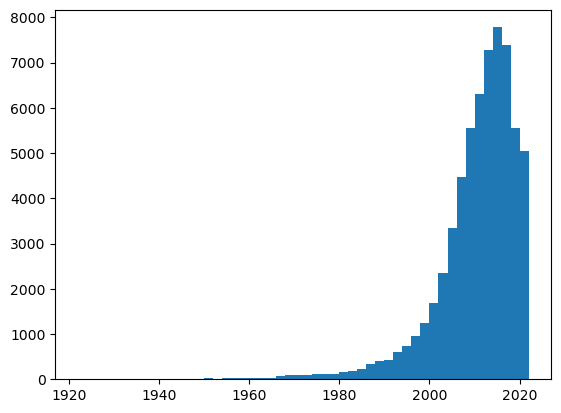

In [74]:
year_fig, year_ax = plt.subplots()
year_hist = year_ax.hist(pd.DatetimeIndex(manga_df['real_start_date']).year, bins=50)

In [82]:
print('Total:', np.sum((pd.DatetimeIndex(manga_df['real_start_date']).year >= 2012) & (pd.DatetimeIndex(manga_df['real_start_date']).year <= 2017)))
print('From:', year_hist[1][year_hist[0].argmax() - 1], 'to', year_hist[1][year_hist[0].argmax() + 2] - 1)

Total: 22431
From: 2012.0 to 2017.0


Qua thực tế và đồ thị, ta thấy rằng ngành công nghiệp manga đã, đang và sẽ tiếp tục phát triển mạnh mẽ.Nhưng để phân tích thời điểm có nhiều bộ manga bắt đầu nhất, từ đồ thị ta sẽ lấy ra 3 cột cao nhất (có giá trị lớn hơn 7.000 manga). Ba cột này thuộc các năm từ 2012 đến 2017

Có thể thấy tuy chỉ 6 năm (~6% khoảng thời gian từ min = 1922 đến max = 2022) nhưng số bộ manga trong dataset thuộc khoảng thời gian này chiếm ~33% (22.341 trên tổng số 67.273)

Ta sẽ lấy ra những bộ manga thuộc khoảng thời gian này và lưu vào manga_boom_df

In [86]:
manga_boom_df = manga_df[(pd.DatetimeIndex(manga_df['real_start_date']).year >= 2012) & (pd.DatetimeIndex(manga_df['real_start_date']).year <= 2017)]
manga_boom_df

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,members,favorites,sfw,approved,created_at_before,updated_at,real_start_date,real_end_date,genres,themes,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms,jikan
7,56805,Koe no Katachi,manga,8.86,132459,finished,7.0,64.0,2013-08-07,2014-11-19,244653,21260,True,True,2013-08-05 16:25:39+00:00,2022-04-18 05:00:47+00:00,2013-08-07,2014-11-19,"[Award Winning, Drama]",[Romantic Subtext],[Shounen],"[{'id': 10951, 'first_name': 'Yoshitoki', 'las...",[Shounen Magazine (Weekly)],"Shouya Ishida, a mischievous elementary school...","Before Koe no Katachi was serialized, the Japa...",https://cdn.myanimelist.net/images/manga/1/120...,https://myanimelist.net/manga/56805/Koe_no_Kat...,A Silent Voice,聲の形,[The Shape of Voice],True
8,90125,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,manga,8.92,98602,currently_publishing,NaN,NaN,2015-05-19,NaT,223578,25182,True,True,2015-06-07 08:34:21+00:00,2022-04-18 05:07:31+00:00,2015-05-19,NaT,"[Award Winning, Comedy]","[Romantic Subtext, School]",[Seinen],"[{'id': 2139, 'first_name': 'Aka', 'last_name'...",[Young Jump],Considered a genius due to having the highest ...,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,https://cdn.myanimelist.net/images/manga/3/188...,https://myanimelist.net/manga/90125/Kaguya-sam...,Kaguya-sama: Love is War,かぐや様は告らせたい～天才たちの恋愛頭脳戦～,[Kaguya Wants to be Confessed To: The Geniuses...,True
11,44347,One Punch-Man,manga,8.74,195826,currently_publishing,NaN,NaN,2012-06-14,NaT,403311,33224,True,True,2012-10-22 09:02:38+00:00,2022-04-18 04:45:56+00:00,2012-06-14,NaT,"[Action, Comedy]","[Parody, Super Power]",[Seinen],"[{'id': 1903, 'first_name': 'Yusuke', 'last_na...",[Tonari no Young Jump],"After rigorously training for three years, the...",One Punch-Man is the manga remake of the origi...,https://cdn.myanimelist.net/images/manga/3/806...,https://myanimelist.net/manga/44347/One_Punch-Man,One-Punch Man,ワンパンマン,"[Onepunchman, Onepanman, OPM]",True
14,35243,Haikyuu!!,manga,8.84,89090,finished,45.0,407.0,2012-02-20,2020-07-20,187357,16347,True,True,2012-03-09 09:27:52+00:00,2022-04-24 17:16:37+00:00,2012-02-20,2020-07-20,"[Award Winning, Sports]","[School, Team Sports]",[Shounen],"[{'id': 8260, 'first_name': 'Haruichi', 'last_...",[Shounen Jump (Weekly)],The whistle blows. The ball is up. A dig. A se...,Haikyuu!! won the 61st Shogakukan Manga Award ...,https://cdn.myanimelist.net/images/manga/2/258...,https://myanimelist.net/manga/35243/Haikyuu,Haikyu!!,ハイキュー!!,"[High Kyuu!!, HQ!!, Nisekyuu!!]",True
18,70345,Grand Blue,manga,9.03,55772,currently_publishing,NaN,NaN,2014-04-07,NaT,148627,15107,True,True,2014-04-09 23:11:57+00:00,2022-07-18 22:19:10+00:00,2014-04-07,NaT,[Comedy],[],[Seinen],"[{'id': 7108, 'first_name': 'Kenji', 'last_nam...",[good! Afternoon],Among the seaside town of Izu's ocean waves an...,Grand Blue has been published digitally in Eng...,https://cdn.myanimelist.net/images/manga/2/166...,https://myanimelist.net/manga/70345/Grand_Blue,Grand Blue Dreaming,ぐらんぶる,[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67235,149598,Colorless Girl,manga,NaN,0,finished,3.0,15.0,2017-06-05,2021-09-15,0,0,True,False,2022-07-23 17:53:09+00:00,NaT,2017-06-05,2021-09-15,[Drama],[School],[Josei],[],[],"Aoi is a perfect, beautiful girl who is always...",,https://cdn.myanimelist.net/images/manga/2/265...,https://myanimelist.net/manga/149598,,カラーレスガール,[],False
67241,149606,Jiseul,manhwa,NaN,0,finished,1.0,10.0,2014-04-03,2014-04-03,0,0,True,False,2022-07-23 20:20:16+00:00,NaT,2014-04-03,2014-04-03,[Drama],[Historical],[],[],[],Keum-Suk Gendry-Kim's adaptation of O Muel's 2...,,https://cdn.myanimelist.net/images/manga/3/265...,https://myanimelist.net/manga/149606,,지슬,[],False
67252,149635,Kokuhaku no Jikan,manga,NaN,0,finished,1.0,3.0,2016-08-09,2016-10-04,0,0,Tr

#### Sau khi đã có khoảng thời gian cụ thể, ta sẽ xem thể loại và chủ đề nào xuất hiện nhiều nhất trong thời gian này

In [98]:
print(manga_df['genres'].explode().value_counts()[:5], '\n')
print(manga_boom_df['genres'].explode().value_counts()[:5])

Romance    17622
Comedy     15015
Hentai     12215
Fantasy    10830
Drama       9915
Name: genres, dtype: int64 

Romance      6000
Comedy       4642
Hentai       4557
Fantasy      3892
Boys Love    2918
Name: genres, dtype: int64


In [99]:
print(manga_df['themes'].explode().value_counts()[:5], '\n')
print(manga_boom_df['themes'].explode().value_counts()[:5])

School           10661
Historical        2534
Harem             2332
Psychological     1688
Mythology          844
Name: themes, dtype: int64 

School           3949
Harem            1016
Historical        620
Psychological     408
Mythology         230
Name: themes, dtype: int64


Từ 2 đoạn code trên ta có thể thấy những thể loại và chủ đề xuất hiện nhiều nhất trong [2012, 2017] cũng xuất hiện nhiều nhất trong toàn bộ dataset

Các thể loại và chủ đề như: Romance và School vẫn luôn chiếm phần lớn. Trong số này ta sẽ chọn ra 3 thể loại và 3 chủ đề nhiều nhất (Romane, Comedy, Hentai và School, Historical, Harem)

#### Ta sẽ xem có bao nhiêu manga trong số này thành công đến thời điểm hiện tại

### **_01.3. Câu hỏi 03: Xếp hạng các mangaka_**